In [6]:
#This script imports the optimized electrode displacement sweep and analyzes 
#its response against open loop data with capacitance measurement and optitrack

import csv
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
import bagpy
from tqdm.notebook import tqdm

In [7]:
opti_column = 7 #column in optitrack for displacement axis

In [8]:
def read_opti_data(optitrack_file):
    opti_data = np.array([[0,0]])

    with open(optitrack_file) as readfile:
        reader = csv.reader(readfile, delimiter=',')
        for i in range(opti_column + 1):
            next(reader)
        for line in tqdm(readfile):
            values = line.strip().split(',')
            if values[opti_column] == '':
                continue
            time_opti= float(values[1])
            disp_opti = float(values[opti_column]) * 1e3 #convert to mm
            opti_data = np.append(opti_data,[[time_opti, disp_opti]], axis = 0)

    #Zero array
    opti_data = opti_data[1:,:] - opti_data[1,:]
    opti_data[:,1] = -1*opti_data[:,1] #Flip to contraction


    start_index = np.argmax(np.diff(opti_data[:120*20,1])) #Test starts with biggest difference between 0 and 20 seconds

    opti_data[:,0] = opti_data[:,0] - opti_data[start_index,0] #re-zero time to start of test
    return opti_data

In [9]:
optitrack_file = 'CL_3/PWM_discrete_kp005_kd001_step_sinusoid.csv'
    
#Read in optitrack data

opti_data = read_opti_data(optitrack_file)

EXTENDED_LEN = 42
AMPLITUDE_SCALE = 6.0
PHASE_OFFSET = np.pi*1.2
ZERO_POINT = 29
PERIODICITY = 0.790
sinu_fit = EXTENDED_LEN -(np.cos(np.array(opti_data[:,0])*PERIODICITY+PHASE_OFFSET)*AMPLITUDE_SCALE + ZERO_POINT)
sinu_commanded = EXTENDED_LEN -(np.cos(np.array(opti_data[:,0])*PERIODICITY+PHASE_OFFSET)*4 + ZERO_POINT)


0it [00:00, ?it/s]

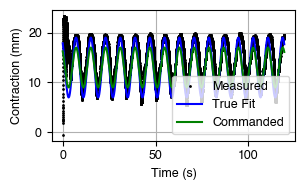

In [10]:
plt.figure(figsize=(3.25,2),facecolor=(1, 1, 1),tight_layout=True)

plt.plot(opti_data[start_index:,0], opti_data[start_index:,1], 'k.', markersize = 2, alpha = 1, label='Measured')
plt.plot(opti_data[start_index:,0], sinu_fit[start_index:], 'b', markersize = 2, alpha = 1, label='True Fit')
plt.plot(opti_data[start_index:,0], sinu_commanded[start_index:], 'g', markersize = 2, alpha = 1, label='Commanded')
plt.rcParams['font.sans-serif'] = ['Helvetica', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

plt.xlabel('Time (s)', fontsize=9)
plt.ylabel('Contraction (mm)', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(fontsize=9)
write_name = 'sinusoid.png'
plt.grid('True')

plt.savefig(fname=write_name, dpi=600, format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)

plt.show()